<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE - TOEPASSING TRENDLIJN - DE POST</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook krijg je data voorgeschoteld van de Belgische postbedeling. <br>
    - Je bepaalt de mate van samenhang a.d.h.v. de correlatiecoëfficiënt.<br>
    - Je bepaalt de vergelijking van de regressielijn. <br>
    - Je stelt de gegeven data en de regressielijn duidelijk voor op een grafiek. 
</div>

Je vindt de data die je nodig hebt in een csv-file. Je vindt het bestand in de map `data`: `post.csv`.
Vergeet niet van de nodige modules te importeren. 

<img src="images/postbode.jpg" alt="Banner" width="400"/>

# Voorbeeldoplossing

### Nodige modules importeren

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

In [3]:
# voorbeeldscript
post = pd.read_csv("data/post.csv")
post

,jaar,aantal brieven per dag
0,2010,204
1,2011,196
2,2012,189
3,2013,179
4,2014,171
5,2015,162


In [5]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = post["jaar"]
y = post["aantal brieven per dag"]

x = np.array(x)
y = np.array(y)

In [6]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
print(x_min, x_max, y_min, y_max)

2010 2015 162 204


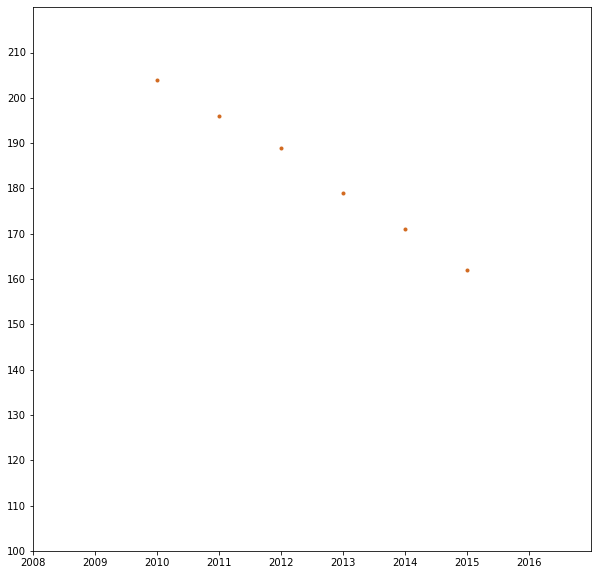

In [16]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2008, xmax=2017, ymin=100, ymax=220)        # vensterinstellingen
# plt.axis("equal")  
plt.xticks(np.arange(2008, 2017, step=1))
plt.yticks(np.arange(100, 220, step=10))

plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

Je kan de correlatiecoëfficiënt bepalen met de functie `corrcoef()` uit de module NumPy. Deze functie geeft eigenlijk een tabel terug met 2 rijen en 2 kolommen, waarvan de correlatiecoëfficiënt te vinden is op de eerste rij in de tweede kolom.  

In [17]:
#voorbeeldscript
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])     # 0 wijst op eerste rij en 1 op tweede kolom

Correlatiecoëfficiënt R = -0.9990819895936358


Dit wijst op een *negatieve zeer sterke lineaire samenhang*. 

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [18]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en 'onthouden'
def linreg(rechte, x, y):
    """Rechte best passend bij datapunten x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit kijkt in def rechte hoe functievoorschrift eruit ziet
    # curve_fit geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return rechte(x, a, b)                          # geeft f(x) terug van regressielijn f

In [19]:
# regressielijn zoeken bij gegeven punten
y_regressielijn = linreg(rechte, x, y)                # y_regressielijn verwijst naar f(x) van regressielijn f

y =  -8.428571428590882 x + 17146.000000035157


<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

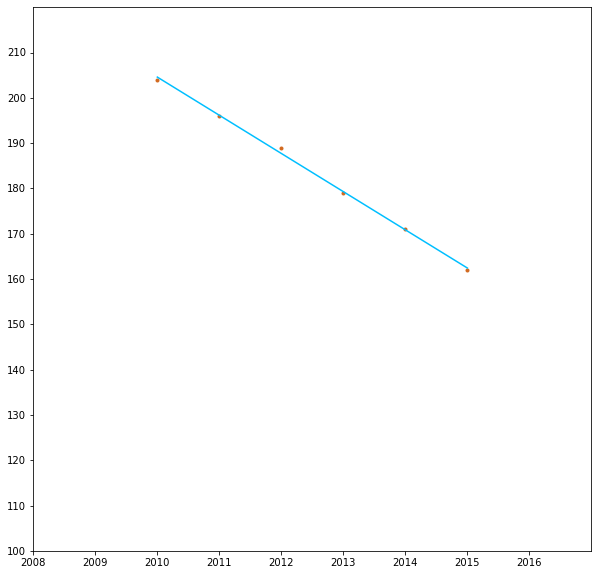

In [20]:
# voorbeeldscript
# grafiek puntenwolk samen met regressielijn
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2008, xmax=2017, ymin=100, ymax=220)        # vensterinstellingen
# plt.axis("equal")  
plt.xticks(np.arange(2008, 2017, step=1))
plt.yticks(np.arange(100, 220, step=10))
                        
plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk     

plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

<div class="alert alert-box alert-warning">
In de volgende notebooks ga je hiermee aan de slag om zelf de regressielijn bij bepaalde data te visualiseren, en de vergelijking van de rechte weer te geven.
</div>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 